# **2023 Summer Lab Skills Workshop**
---------
# ***Day 5: Python for Electrophysiology Data Analysis***

> ## **Instructor: Tucker Hindle**
> ### Date: 2023 June 23
> ### [Link to Colab Notebook](https://colab.research.google.com/drive/1ix5N38T4tl9ih4u2pSt-tuu3R5WCuL2W?usp=sharing)
![](https://drive.google.com/uc?export=view&id=1xkiiIM-iDIACxeq-xgtw0xQ-zVimwVIi)

## **Learning Objectives**

* Gain hands-on training with Python in the context of Data Science.
* Have an early experience in signal processing using earthworm action potentials.
* Calculate the conduction velocity of the earthworm MGF and LGF axons.
* Compare conduction velocity vs axon diameter for the earthworm MGF and LGF.
* Explore how the temperature condition affects conduction velocity.

## Fundamental Concepts from Lab Activity

### Earthworm Anatomy

The lab activity focused on an invertebrate model species: the earthworm, or _lumbricus terrestris_. The general earthworm anatomy is shown below with a cross-section zooming in on the ventral nerve cord with a view of the lateral giant fibers (LGFs) and medial giant fiber (MGF).

![](https://drive.google.com/uc?export=view&id=1DIaa_3Mx993vQl9847FYgVbI5eEw66WZ)

Image Credit: Shannon KM, Gage GJ, Jankovic A, Wilson WJ, Marzullo TC. Portable conduction velocity experiments using earthworms for the college and high school neuroscience teaching laboratory. _Adv Physiol Educ_. 2014 Mar;38(1):62-70. doi: 10.1152/advan.00088.2013.

Micrograph of the _lumbriculus variegatus_ lateral giant fibers (LGFs) and medial giant fiber (MGF).

![](https://drive.google.com/uc?export=view&id=1tjGaPB7orJpSQ2F2vTi0GZsi7xDVvxn0)

Image Credit: © 2015 by Richard F. Olivo. Lab 4: Action Potentials in Earthworm Giant Axons Biological Sciences 300, Smith College | Neurophysiology | Link https://www.science.smith.edu/departments/neurosci/courses/bio330/labs/L4giants.html

### Lab Rig Set-Up
Recall our apparatus that was placed inside a faraday cage to reduce electrical signal noise. The preamplifier connects the cables, pinned into our specimen, from our animal preparation. The output from the amplifier (a coax cable) runs into the oscilloscope and splits to a channel in the PicoScope software. A dual banana plug to coax connects the stimulator to the oscilloscope trigger. Another dual banana plug to coax connects the positive (+) and negative (-) output on the stimulator to the animial preparation and a separate channel in PicoScope. The coax cable runs to the (+) and (-) pins in our specimen.

![](https://drive.google.com/uc?export=view&id=1vZl8Dn7hMd_N0nedDObPIdkkmCIzNKPQ)

![](https://drive.google.com/uc?export=view&id=1P-WJeKEioRruKBCNIje3Rw6ayNiSkT9K)

### Animal Preparation

The earthworm is anesthetized before inserting the elecrodes. 5.	The positive (+) and negative (-) stimulating electrodes should be approximately 1 centimeter apart running down the midline or 2 millimeters apart centered on the midline anterior to the clitellum. The `G1` and `G2` recording electrodes should also be approximately 1 cm apart posterior to the clitellum. A ground electrode `GND` can be inserted in either the anterior or posterior end to reduce the noise seen on PicoScope.


**The earthworm needs to be dorsal side up with the ground, positive and negative electrodes (stimulating pins) inserted rostrally and G1 and G2 electrodes caudally.** Label distance 1 (D1) from the stimulus to G1, distance 2 (D2) from the stimulus to G2, and distance 3 (D3) from G1 to G2.

![](https://drive.google.com/uc?export=view&id=1pdlFYGZOpeD8fHwxsakgC92ij9_zfvJq)

The Earthworm pictured below is prepped for generating and recording action potentials across the MGF and LGF axons. The ground electrode is connected to the head of the earthworm and to the faraday cage. Two stimulating electrodes connect the stimulator to the earthworm. Two recording electrodes pick up the action potential at the right of the earthworm and send the signal to the amplifier. Figure courtesy of Victoria Karalutz.

![Earthworm Preparation Actual](https://drive.google.com/uc?export=view&id=1Nt6zmSux6V65TjODlIyCT3uuslCs15ZA)

### PicoScope

PicoScope had the following settings: `Channel A` on AC to +/- 1V, the scale of x axis is 2 ms/dv, `Channel B` on AC to +/-2 V. The trigger is on Auto on `Channel B`.

Action Potentials seen from PicoScope in Earthworm. The stimulus is shown on the left at `time = 0 seconds`. The first action potential displays G1 and G2 (recording electrodes) and is the MGF action potential. The second action potential displays G1 and G2 and is the LGF action potential. The second MGF and LGF action potentials are shown due to the selection of the “twin pulses” on the stimulator.

![](https://drive.google.com/uc?export=view&id=1Bd1lhRn2L4niUm1gZnByHb6y8FGfE0IJ)

## Part 1: Action Potentials

### Imports

[Python](https://www.python.org) is a widely used scripting and programming language. Its popularity is, in part, due to its simplicity and the large ecosystem of domain-specific [packages](https://pypi.org) built on base Python.

A few essentials in the Data Science Stack are:
* `numpy` [*numpy.org*](numpy.org) | efficient storage for *n*-dimensional arrays and numerical computation
* `pandas` [*pandas.pydata.org*](pandas.pydata.org) | working with tabular data (wrangling, tidying, etc.)
* `matplotlib` [*matplotlib.org*](matplotlib.org) | data visualization tools and creating publication-quality plots
* `scipy` [*scipy.org*](scipy.org) | scientific programming (statistical analysis, optimization, calculus, linear algebra, signal processing, etc.)

<br></br>
A Python package consists of modules, each with its own functions, classes, etc. The `import` keyword is used to access a module:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import linregress, pearsonr, f_oneway
from scipy.signal import find_peaks

### Load Dataset

Our signal is stored as Time (milliseconds) and Voltage (millivolts) pairs in comma-separated values `CSV` format.  We will use `pandas.read_csv()` to read our file `waveform_earthworm_55mmLtoG1_59mmLtoG2.csv` into a Pandas DataFrame.

In [2]:
filepath = 'https://raw.githubusercontent.com/tuckerhindle/laboratory-workshops/main/electrophysiology/data/waveform_earthworm_55mmLtoG1_59mmLtoG2.csv'

df = pd.read_csv(filepath)
df

,Time (ms),Voltage (mV)
0,-1.321415,-73.99212
1,-1.318855,-73.99212
2,-1.316295,-73.99212
3,-1.313735,-73.99212
4,-1.311175,-69.50591
...,...,...
7767,18.669625,-78.46308
7768,18.672185,-73.99212
7769,18.674745,-73.99212
7770,18.677305,-73.99212


### Visualize Signal

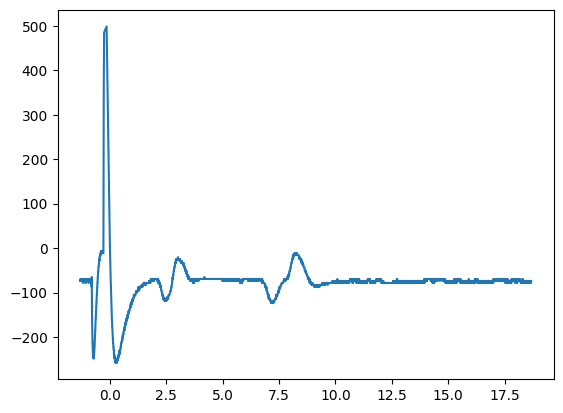

In [3]:
x = df['Time (ms)']
y = df['Voltage (mV)']

plt.plot(x, y)

### Signal Processing

During the lab activity, we manually selected G1 and G2 for both axons, MGF and LGF. Now, we will use `scipy.signal.find_peaks()` to automatically extract peaks in our signal by specifying what a "peak" actually is, based on user-defined properties.
<br></br>
The `find_peaks()` function compares neighboring values to extract the indices of all local maxima/minima that satisfy the given conditions. Its input arguments are:
* `y` was previously assigned as `y = df['Voltage (mV)']`
* `prominence` of a peak measures how much a peak stands out from the surrounding baseline of the signal and is defined as the vertical distance (e.g., 50 mV) between the peak and its lowest contour line.
* `distance` is the minimal horizontal distance (e.g., 100 ms) in samples between neighbouring peaks.

In [4]:
peaks_max, _ = find_peaks(y, prominence=50, distance=100) # tolerance 50mV 100ms

In [5]:
print(f"The indices of local maxima are {peaks_max}")

The indices of local maxima are [ 414 1651 3674]


We can use `pandas.DataFrame.iloc()` for integer-location based indexing (i.e., selection by position).

For example, since Python uses zero-based indexing, a DataFrames' sequential row numbers are counted as `0, 1, 2, 3, ... , n`

Recall that the `find_peaks()` function returned the indices of all local maxima that met our specified criteria (i.e., these were integer positions #`414` , #`1651`, and #`3674`).

By passing the peaks' row indices stored in the `peaks_max` variable to the `iloc()` function, we can retrieve data at those postions in our DataFrame `df`.

In [6]:
local_maxima = df.iloc[peaks_max]
local_maxima

,Time (ms),Voltage (mV)
414,-0.154055,498.42830
1651,3.012665,-20.32533
3674,8.191545,-11.38340


#### 1.1 Your Turn!  Extract the local minima in our signal

In [7]:
# Step 1 Find the indices of minimum peaks using tolerance values of 25mV 100ms
peaks_min, _ = find_peaks(-y, prominence=25, distance=100)

# Step 2 Select the minimum peaks by integer-position indexing (i.e., row numbers)
local_minima = df.iloc[peaks_min]

# Step 3 Print the result
print(local_minima)

      Time (ms)  Voltage (mV)
230   -0.732615     -248.4054
575    0.258105     -257.3473
1417   2.413625     -118.7017
3265   7.144505     -123.1727


### Peaks in Signal
Let's visualize the peaks we found by plotting all local minima and maxima.

`matplotlib.pyplot.scatter()` allows us to generate a scatter plot of `y` vs. `x` with varying marker size (e.g., `s=15` for 15 pt marker size) and/or color (e.g., `c='r'` for red color).

We can overlay these points on our signal by plotting the waveform as before `matplotlib.pyplot.plot(x, y)`. Note: `alpha=0.3` specifies 70% transparency and is used here for aesthetics only.

You could optionally choose to select data by column label and then assign to new variables. However, it is acceptable to pass directly without variable assignment.
* `x = local_maxima['Time (ms)']`
* `y = local_maxima['Voltage (mV)']`

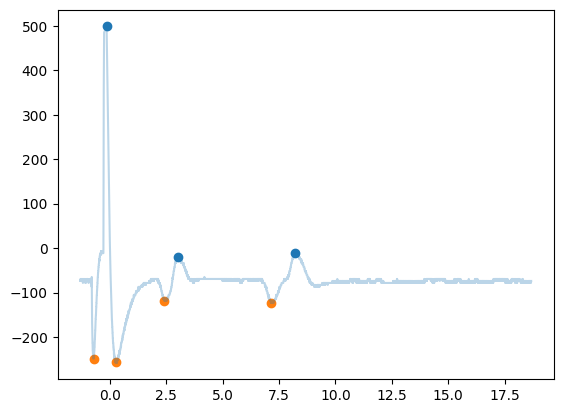

In [8]:
plt.plot(x, y, alpha=0.3)

plt.scatter(local_maxima['Time (ms)'], local_maxima['Voltage (mV)'])
plt.scatter(local_minima['Time (ms)'], local_minima['Voltage (mV)'])

Let's get the x, y coordinates of G1 for the MGF and LGF axons.

The `x` and `y` axes represent `time` and `voltage`, respectively.  We can index by column labels `Time (ms)` and `Voltage (mV)` to return a Series of only x or y coordinates.  Then, we can index by integer postition to get only the peaks of interest.

In [9]:
mgf_g1_xcoord, lgf_g1_xcoord = local_minima['Time (ms)'][2:4]
mgf_g1_ycoord, lgf_g1_ycoord = local_minima['Voltage (mV)'][2:4]

In [10]:
print(f"MGF G1 Coordinates: {mgf_g1_xcoord, mgf_g1_ycoord}")
print(f"LGF G1 Coordinates: {lgf_g1_xcoord, lgf_g1_ycoord}")

MGF G1 Coordinates: (2.41362503, -118.7017)
LGF G1 Coordinates: (7.144505, -123.1727)


#### 1.2 Your Turn! Find the G2 coordinates for both axons

In [11]:
# Step 1 Select the time at which G2 occurs for MGF and LGF by indexing
mgf_g2_xcoord, lgf_g2_xcoord = local_maxima['Time (ms)'][1:3]

# Step 2 Select the voltage at which G2 occurs for MGF and LGF by indexing
mgf_g2_ycoord, lgf_g2_ycoord = local_maxima['Voltage (mV)'][1:3]

In [12]:
# Step 3 Print the result
print(f"MGF G2 Coordinates: {mgf_g2_xcoord, mgf_g2_ycoord}")
print(f"LGF G2 Coordinates: {lgf_g2_xcoord, lgf_g2_ycoord}")

MGF G2 Coordinates: (3.01266502, -20.32533)
LGF G2 Coordinates: (8.19154499, -11.3834)


### Latency from G1 to G2

Previously, we extracted the coordinates of G1 and G2 for both axons, MGF and LGF. These include the x-coordinates, i.e., Times (ms).

Latency refers the delay between stimilulus delivery at `Time = 0` and the response at the recording electrodes, `G1` and `G2`.


In [13]:
print(f"MGF Latency to G1 = {mgf_g1_xcoord:.2f} ms\nMGF Latency to G2 = {mgf_g2_xcoord:.2f} ms")

MGF Latency to G1 = 2.41 ms
MGF Latency to G2 = 3.01 ms


In [14]:
mgf_g1_to_g2 = mgf_g2_xcoord - mgf_g1_xcoord

print(f"MGF G1 to G2 = {mgf_g1_to_g2:.2f} ms")

MGF G1 to G2 = 0.60 ms


#### 1.3 Your Turn! Calculate the latency from G1 to G2 for LGF

In [15]:
# Step 1 Find the response latency for G1 and G2
print(f"LGF Latency to G1 = {lgf_g1_xcoord:.2f} ms \nLGF Latency to G2 = {lgf_g2_xcoord:.2f} ms")

LGF Latency to G1 = 7.14 ms 
LGF Latency to G2 = 8.19 ms


In [16]:
# Step 2 Calculate the time it took the electric pulse to travel from G1 to G2
lgf_g1_to_g2 = lgf_g2_xcoord - lgf_g1_xcoord

# Step 3 Print the result
print(f"LGF G1 to G2 = {lgf_g1_to_g2:.2f} ms")

LGF G1 to G2 = 1.05 ms


### Amplitude of G1 and G2

Previously, we extracted the coordinates of G1 and G2 for both axons, MGF and LGF. These include the y-coordinates, i.e., Voltages (mV).

The amplitude is the maximum extent of an oscillation, measured from the position of equilibrium. We can manually define a baseline position of equilibrium as `-72.75 mV` and use the peaks to calculate the amplitude of G1 and G2.

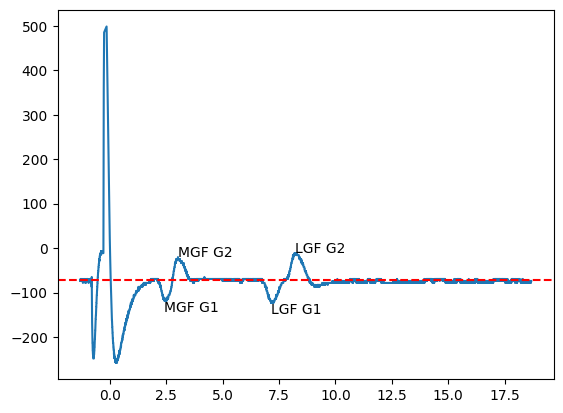

In [17]:
plt.plot(x, y)

plt.text(mgf_g1_xcoord, mgf_g1_ycoord, 'MGF G1', va='top')
plt.text(mgf_g2_xcoord, mgf_g2_ycoord, 'MGF G2')

plt.text(lgf_g1_xcoord, lgf_g1_ycoord, 'LGF G1', va='top')
plt.text(lgf_g2_xcoord, lgf_g2_ycoord, 'LGF G2')

baseline = -72.75 # mV
plt.axhline(baseline, c='r', ls='--')

plt.show()

In [18]:
mgf_g1_amplitude = mgf_g1_ycoord - baseline
mgf_g2_amplitude = mgf_g2_ycoord - baseline

In [19]:
print(f"MGF G1 = {mgf_g1_amplitude:.1f} mV")
print(f"MGF G2 = {mgf_g2_amplitude:.1f} mV")

MGF G1 = -46.0 mV
MGF G2 = 52.4 mV


#### 1.4 Your Turn! Calculate the amplitudes of G1 and G2 for LGF

In [20]:
# Step 1 Find the peak height relative to the baseline
lgf_g1_amplitude = lgf_g1_ycoord - baseline
lgf_g2_amplitude = lgf_g2_ycoord - baseline

In [21]:
# Step 2 Print the result
print(f"LGF G1 = {lgf_g1_amplitude:.1f} mV")
print(f"LGF G2 = {lgf_g2_amplitude:.1f} mV")

LGF G1 = -50.4 mV
LGF G2 = 61.4 mV


## Part 2: Conduction Velocity

### Explore differences between MGF and LGF conduction velocities

The `conduction_velocity_dataset.xlsx` has the following measurements for three earthworms, each with MGF and LGF axons. Note that we calculated these in `Part 1: Earthworm Action Potentials`.

* `L-G1 (mm)` | Distance to G1 (millimeters)
* `L-G1 (ms)` | Latency to G1 (milliseconds)
* `L-G2 (mm)` | Distance to G2 (millimeters)
* `L-G2 (ms)` | Latency to G2 (milliseconds)
* `G1-G2 (mm)` | Length between G1 and G2 (millimeters)
* `G1-G2 (ms)` | Time between G1 and G2 (milliseconds)

In [22]:
samples = pd.read_excel('https://raw.githubusercontent.com/tuckerhindle/laboratory-workshops/main/electrophysiology/data/conduction_velocity_dataset.xlsx')
samples

,ID,Axon,L-G1 (mm),L-G1 (ms),L-G2 (mm),L-G2 (ms),G1-G2 (mm),G1-G2 (ms)
0,Worm 1,MGF,55,3.449,60,4.006,10,0.6120
1,Worm 1,LGF,55,8.289,60,9.124,10,0.8091
2,Worm 2,MGF,35,1.947,45,2.448,15,0.5007
3,Worm 2,LGF,35,5.508,45,6.676,15,1.1678
4,Worm 3,MGF,55,2.445,65,2.902,10,0.5080
5,Worm 3,LGF,55,6.856,65,8.121,10,1.1810


_Lumbricus terrestris_, the earthworm, has three nerve cords: one Median Giant Fiber (MGF) and two Lateral Giant Fibers (LGF). These two cords vary in size where the MGF is about 70µm wide, and the LGF is smaller, at 50µm.  We may be particulary interested in how the conduction velocity differs depending on the size (or diameter) of the axon.

Conduction velocity is defined as the speed at which a stimulus travels across a nerve and can be determined by measuring the time (milliseconds) required for an action potential to propagate across a known distance.


Calculate conduction velocity as $ {Δ distance \over Δ time} $

In [23]:
samples['conduction_velocity'] = samples['G1-G2 (mm)'] / samples['G1-G2 (ms)']
samples

,ID,Axon,L-G1 (mm),L-G1 (ms),L-G2 (mm),L-G2 (ms),G1-G2 (mm),G1-G2 (ms),conduction_velocity
0,Worm 1,MGF,55,3.449,60,4.006,10,0.6120,16.339869
1,Worm 1,LGF,55,8.289,60,9.124,10,0.8091,12.359412
2,Worm 2,MGF,35,1.947,45,2.448,15,0.5007,29.958059
3,Worm 2,LGF,35,5.508,45,6.676,15,1.1678,12.844665
4,Worm 3,MGF,55,2.445,65,2.902,10,0.5080,19.685039
5,Worm 3,LGF,55,6.856,65,8.121,10,1.1810,8.467401


Raw data can be summarized to provide better insights. For example, we could compare the average conduction velocity for each type of axon, MGF and LGF. This would help to quantify a difference based on axon diameter.

We will use a `pandas.DataFrame.groupby()` operation, which has three components:

1. split the object
2. apply a function
3. combine the results

This allows us to apply an aggregation function (e.g., average mean) to each category of data. In our example, the two groups (or categories) we would like to compare are the axons - MGF and LGF.  This attribute is stored in the `Axon` column.

`groupby()` will first split data into MGF and LGF. Since we are interested in the conduction velocity, we will index by column label `conduction_velocity` to select that Series only. Finally, we will aggregrate to the average mean value.

In [24]:
cv = samples.groupby(['Axon'])['conduction_velocity']

cv_avg = cv.mean()
cv_avg

Axon
LGF    11.223826
MGF    21.994322
Name: conduction_velocity, dtype: float64

Calculate the standard error of the mean (SEM) as $$ SEM = {s \over \sqrt{n}} $$

The standard error provides a measurement of how repeatable or variable the data is from trial to trial. The amount of error in your experimental measurements will be important when forming conclusions based on these measurements.

Standard Error of the Mean and Standard Deviation are commonly used statistics to display error bars on plots.

In [25]:
cv_sem = cv.sem()
cv_sem

Axon
LGF    1.385313
MGF    4.097290
Name: conduction_velocity, dtype: float64

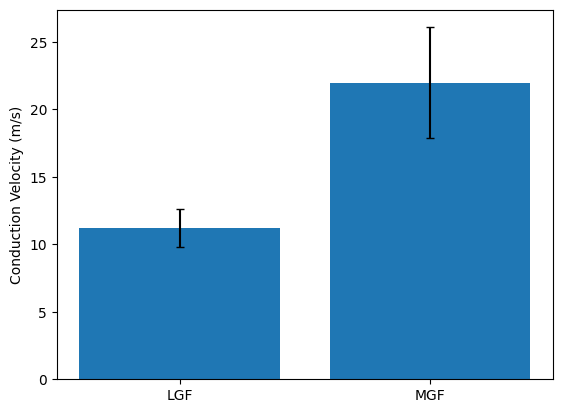

In [26]:
plt.bar(cv_avg.index, cv_avg, yerr=cv_sem, capsize=3)

plt.ylabel('Conduction Velocity (m/s)')
plt.show()

### Quantify relationship between axon diameter and conduction velocity

The following dataset contains measurements of the axon diameter (millimeters) and conduction velocity (milliseconds).

In [27]:
column_labels = ['Diameter (um)', 'Time (ms)', 'CV (m/s)']

cv_data = [
    [8.85, 2.69, 4.674],
    [19.24, 1.88, 4.267],
    [25.77, 1.51, 5.316],
    [27.36, 1.29, 6.202],
    [43.03, 1.14, 6.358],
    [56.16, 1.02, 7.843],
    [62.61, 1.01, 8.521],
    [77.97, 0.875, 8.543],
    [91.67, 0.82, 9.756],
    [96.07, 0.74, 10.811]
]

data = pd.DataFrame(cv_data, columns=column_labels)
data

,Diameter (um),Time (ms),CV (m/s)
0,8.85,2.690,4.674
1,19.24,1.880,4.267
2,25.77,1.510,5.316
3,27.36,1.290,6.202
4,43.03,1.140,6.358
5,56.16,1.020,7.843
6,62.61,1.010,8.521
7,77.97,0.875,8.543
8,91.67,0.820,9.756
9,96.07,0.740,10.811


Since we want to visualize the relationship between two variables, we define a utility function to calculate a linear least-squares regression for two sets of measurements, then plot the result.



In [28]:
def visualize_relationship(x, y):

    fit = linregress(x, y)
    slope = fit.slope
    intercept = fit.intercept

    plt.scatter(x, y)
    plt.plot(x, intercept + slope * x, color='r')

    plt.ylabel(f'{y.name}')
    plt.xlabel(f'{x.name}')

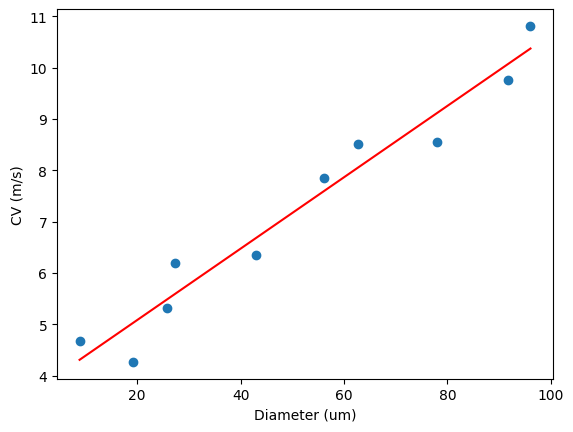

In [29]:
diameter = data['Diameter (um)']
cv = data['CV (m/s)']

visualize_relationship(diameter, cv)

In [30]:
corr, p = pearsonr(diameter, cv)

r_squared = corr ** 2

print(f"Pearson r correlation coefficient = {corr:.3f}\nR^2 = {r_squared:.3f}\np-value significance {p:.7f}")

Pearson r correlation coefficient = 0.975
R^2 = 0.952
p-value significance 0.0000015


We can learn two things:

*   How useful is axon diameter for predicting conduction velocity?  $ {R^2} $ tells us this.
*   Is this relationship due to chance?  p-value tells us this.

Refer to the following article for interpretation of result:

Akoglu, H. (2018). User's guide to correlation coefficients. *Turkish Journal of Emergency Medicine*, 18(3), 91-93. https://doi.org/10.1016/j.tjem.2018.08.001

## Part 3: Temperature

Read `temperature_dataset.csv` into a DataFrame using `pandas.read_csv()`

In [31]:
sheet = pd.read_csv('https://raw.githubusercontent.com/tuckerhindle/laboratory-workshops/main/electrophysiology/data/temperature_dataset.csv')
sheet

,ID,Axon,Temp (deg C),L-G1 (mm),L-G1 (ms),L-G2 (mm),L-G2 (ms),G1-G2 (mm),G1-G2 (ms)
0,Worm 1,LGF,14.7,70,9.576,80,11.410,15,4.0420
1,Worm 1,LGF,18.2,70,10.110,80,12.050,15,1.8830
2,Worm 1,LGF,21.6,70,9.347,80,10.460,15,1.2800
3,Worm 1,MGF,14.1,70,4.465,80,5.488,15,1.5500
4,Worm 1,MGF,18.0,70,4.519,80,5.488,15,1.1840
5,Worm 1,MGF,21.6,70,3.672,80,4.451,15,0.8345
6,Worm 2,LGF,15.7,95,11.240,115,12.990,16,3.1640
7,Worm 2,LGF,18.2,95,12.460,115,14.160,16,1.6440
8,Worm 2,LGF,21.9,95,6.557,115,7.213,16,0.7425
9,Worm 2,MGF,15.7,95,4.773,115,5.887,16,1.4710


Calculate conduction velocity

In [32]:
sheet['conduction_velocity'] = sheet['G1-G2 (mm)'] / sheet['G1-G2 (ms)']
sheet

,ID,Axon,Temp (deg C),L-G1 (mm),L-G1 (ms),L-G2 (mm),L-G2 (ms),G1-G2 (mm),G1-G2 (ms),conduction_velocity
0,Worm 1,LGF,14.7,70,9.576,80,11.410,15,4.0420,3.711034
1,Worm 1,LGF,18.2,70,10.110,80,12.050,15,1.8830,7.966012
2,Worm 1,LGF,21.6,70,9.347,80,10.460,15,1.2800,11.718750
3,Worm 1,MGF,14.1,70,4.465,80,5.488,15,1.5500,9.677419
4,Worm 1,MGF,18.0,70,4.519,80,5.488,15,1.1840,12.668919
5,Worm 1,MGF,21.6,70,3.672,80,4.451,15,0.8345,17.974835
6,Worm 2,LGF,15.7,95,11.240,115,12.990,16,3.1640,5.056890
7,Worm 2,LGF,18.2,95,12.460,115,14.160,16,1.6440,9.732360
8,Worm 2,LGF,21.9,95,6.557,115,7.213,16,0.7425,21.548822
9,Worm 2,MGF,15.7,95,4.773,115,5.887,16,1.4710,10.876954


### Feature engineering a categorical variable for the temperature condition

In [33]:
def classify_celsius_temperature(t):

    condition = ''

    if t > 21:
        condition = 'Warm'
    elif t < 16:
        condition = 'Cold'
    else:
        condition = 'Ambient'

    return condition

In [34]:
sheet['Condition'] = sheet['Temp (deg C)'].apply(classify_celsius_temperature)
sheet

,ID,Axon,Temp (deg C),L-G1 (mm),L-G1 (ms),L-G2 (mm),L-G2 (ms),G1-G2 (mm),G1-G2 (ms),conduction_velocity,Condition
0,Worm 1,LGF,14.7,70,9.576,80,11.410,15,4.0420,3.711034,Cold
1,Worm 1,LGF,18.2,70,10.110,80,12.050,15,1.8830,7.966012,Ambient
2,Worm 1,LGF,21.6,70,9.347,80,10.460,15,1.2800,11.718750,Warm
3,Worm 1,MGF,14.1,70,4.465,80,5.488,15,1.5500,9.677419,Cold
4,Worm 1,MGF,18.0,70,4.519,80,5.488,15,1.1840,12.668919,Ambient
5,Worm 1,MGF,21.6,70,3.672,80,4.451,15,0.8345,17.974835,Warm
6,Worm 2,LGF,15.7,95,11.240,115,12.990,16,3.1640,5.056890,Cold
7,Worm 2,LGF,18.2,95,12.460,115,14.160,16,1.6440,9.732360,Ambient
8,Worm 2,LGF,21.9,95,6.557,115,7.213,16,0.7425,21.548822,Warm
9,Worm 2,MGF,15.7,95,4.773,115,5.887,16,1.4710,10.876954,Cold


### Summarize Temperature Condition and Conduction Velocity by Axon Type

A pivot table is a powerful tool to summarize data.  We can group data by multiple categories (e.g., axon type and temperature condition), then apply an aggregation function such as the average mean.

In [35]:
sheet.groupby(['Axon', 'Condition'])['Temp (deg C)', 'conduction_velocity'].mean()

<ipython-input-35-d2bbf6445438>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sheet.groupby(['Axon', 'Condition'])['Temp (deg C)', 'conduction_velocity'].mean()


Temp (deg C)  conduction_velocity
Axon Condition                                   
LGF  Ambient       18.000000             7.913556
     Cold          14.500000             3.511258
     Warm          22.100000            16.215030
MGF  Ambient       17.833333            12.439245
     Cold          14.200000             8.501623
     Warm          22.100000            19.069575

Note the characteristics of "tidy data" used for analysis versus summarized data used for presentation by reading the following article:

Wickham, H. (2014). Tidy Data. *Journal of Statistical Software*, 59(10), 1–23. https://doi.org/10.18637/jss.v059.i10

### Visualize the average conduction velocity by temperature condition

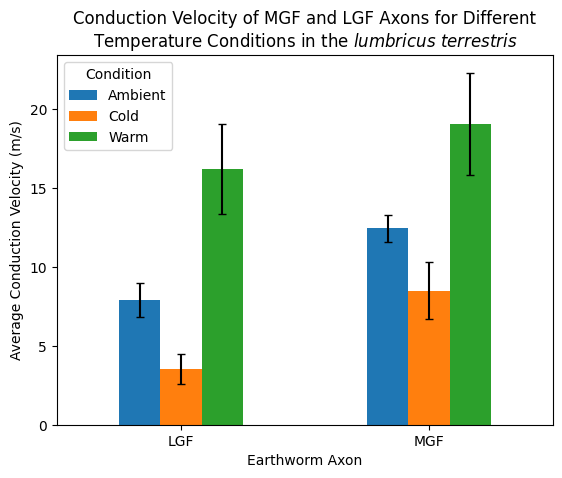

In [36]:
summary = sheet.groupby(['Axon', 'Condition'])['conduction_velocity'].mean().unstack()
stderr = sheet.groupby(['Axon', 'Condition'])['conduction_velocity'].sem().unstack()

summary.plot(kind='bar', yerr=stderr, capsize=3)

plt.title('Conduction Velocity of MGF and LGF Axons for Different\nTemperature Conditions in the ${lumbricus}$ ${terrestris}$')
plt.ylabel('Average Conduction Velocity (m/s)')
plt.xlabel('Earthworm Axon')
plt.xticks(rotation=0)

plt.show()

Think about how you could imporove the visualization.  Re-order and use diverging color ramp from blue (cold), beige (ambient), red (warm)

### Compare Groups Using Statistical Analysis

In [37]:
mgf = sheet.loc[sheet['Axon'] == 'MGF']

dict = {}
for condition in mgf['Condition'].unique():
    group = mgf.loc[mgf['Condition'] == condition]
    dict[condition] =  np.array(group['conduction_velocity'])

dict

{'Cold': array([ 9.67741935, 10.87695445,  4.95049505]),
 'Ambient': array([12.66891892, 13.81692573, 10.83188908]),
 'Warm': array([17.97483523, 25.13747054, 14.09641951])}

In [38]:
cold = dict['Cold']
ambient = dict['Ambient']
warm = dict['Warm']

Analysis of variance (ANOVA) can determine whether the means of 3+ groups are statistically different from one another.

In [39]:
# one-way ANOVA
f_oneway(cold, ambient, warm)

F_onewayResult(statistic=5.90710308880505, pvalue=0.03820800199987847)

## Your Turn! Apply Skills Data You Collected

There were two students groups that observed action potentials during the lab activity. Please read your data into a Pandas DataFrame, then plot the result and stylize to your preference. Stretch Goal: Perform analysis on your actional potentials! Optionally, you can use any other dataset collected earlier this week (e.g., FT-IR Water Quality).


URL for Each Group:
*   Group A: https://raw.githubusercontent.com/tuckerhindle/laboratory-workshops/main/electrophysiology/data/example_student_data/makai.csv
*   Group B: https://raw.githubusercontent.com/tuckerhindle/laboratory-workshops/main/electrophysiology/data/example_student_data/valini.csv

In [40]:
## Your Code Here